<a href="https://colab.research.google.com/github/khalit7/PyTorchMnistClassification/blob/main/PyTorchMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install hiddenlayer



In [43]:
!pip install torchsummary

In [44]:
import torch
import torchvision
import torch
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import hiddenlayer as hl
from torchsummary import summary
from IPython.display import Image

import matplotlib.pyplot as plt

import sys


In [45]:

batch_size = 32
n_epochs = 50

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [46]:
train_set = torchvision.datasets.FashionMNIST (root = ".", train = True ,
download = True , transform = transforms.ToTensor ())
test_set = torchvision .datasets. FashionMNIST (root = ".", train = False ,
download = True , transform = transforms.ToTensor ())
training_loader = torch.utils.data.DataLoader (train_set , batch_size = batch_size,
shuffle = False)
test_loader = torch.utils.data.DataLoader (test_set , batch_size = batch_size,
shuffle = False)


Displaying an example of the data


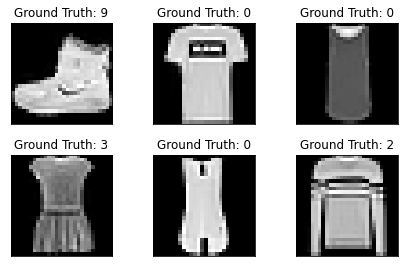

In [47]:
example = enumerate(training_loader)
batc_idx , (example_data,example_target) = next(example)
example_data.shape
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_target[i]))
  plt.xticks([])
  plt.yticks([])

define the training and testing functions

In [48]:
def train(epoch,model,show_progress=True):
  model.train()
  train_loss=0
  for batch_idx, (data, target) in enumerate(training_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    train_loss+=loss.item()
    # if batch_idx % log_interval == 0:
    #   print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
    #     epoch, batch_idx * len(data), len(training_loader.dataset),
    #     100. * batch_idx / len(training_loader), loss.item()))
    #   train_losses.append(loss.item())
    #   train_counter.append(
    #     (batch_idx*batch_size) + ((epoch-1)*len(training_loader.dataset)))
    #   torch.save(model.state_dict(), 'model.pth')
    #   torch.save(optimizer.state_dict(), 'optimizer.pth')
  train_loss /= len(training_loader)
  if show_progress:
    print(" \t Training Loss: {:.6f}".format(train_loss))
  train_losses.append(train_loss)

In [49]:
def test(model,show_progress=True):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  acc = 100. * correct / len(test_loader.dataset)
  if show_progress:
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
      test_loss, correct, len(test_loader.dataset),
      acc))

  return acc

#Question2 Task B. as requested in the question, I used the following configurations:

1.   archectecture described in the assignment pdf
2.   xaviar initialization
3.   learning rate of 0.1
4.   SGD optimizer.
5.   50 epochs




## creating the network and initialize parameters

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(1024,256)
        self.fc2 = nn.Linear(256,10)

        self.initializer_wights()

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 1024)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
    
    def initializer_wights(self):
      for m in self.modules():
        if isinstance(m, nn.Conv2d) or isinstance(m,nn.Linear):
          nn.init.xavier_normal_(m.weight)

## setting the learning rate and the optimizer

In [ ]:
learning_rate = 0.1
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate)

## displaying the model's archetecture

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 24, 24]             832
            Conv2d-2             [-1, 64, 8, 8]          51,264
            Linear-3                  [-1, 256]         262,400
            Linear-4                   [-1, 10]           2,570
Total params: 317,066
Trainable params: 317,066
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.17
Params size (MB): 1.21
Estimated Total Size (MB): 1.39
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


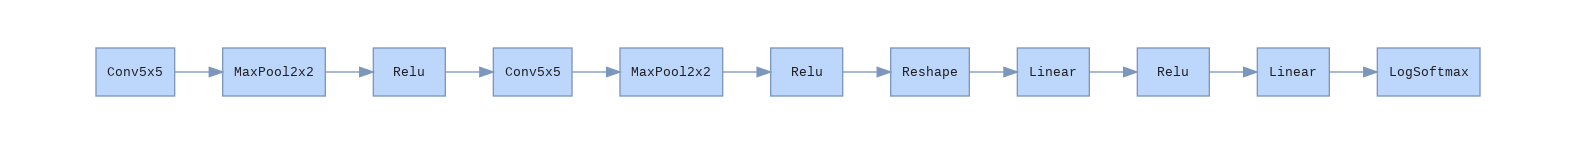

In [ ]:
summary(network,(1,28,28))
transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.

graph = hl.build_graph(network, example_data,transforms = transforms)
graph.theme = hl.graph.THEMES['blue'].copy()
graph.save('CNN_Model', format='png')
Image('CNN_Model.png')

##Training the model

In [ ]:
train_losses = []
test_losses = []
print("Training ... ")
for epoch in range(1, n_epochs + 1):
  print("epoch {}/{}----------------------------------------------------------------------".format(epoch,n_epochs))
  train(epoch,network)
  test(network)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Training ... 
epoch 1/50----------------------------------------------------------------------
 	 Training Loss: 0.527967


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.3771, Accuracy: 8635/10000 (86%)

epoch 2/50----------------------------------------------------------------------
 	 Training Loss: 0.327492

Test set: Avg. loss: 0.3267, Accuracy: 8832/10000 (88%)

epoch 3/50----------------------------------------------------------------------
 	 Training Loss: 0.283172

Test set: Avg. loss: 0.3010, Accuracy: 8929/10000 (89%)

epoch 4/50----------------------------------------------------------------------
 	 Training Loss: 0.254254

Test set: Avg. loss: 0.2910, Accuracy: 8957/10000 (90%)

epoch 5/50----------------------------------------------------------------------
 	 Training Loss: 0.231768

Test set: Avg. loss: 0.2939, Accuracy: 8968/10000 (90%)

epoch 6/50----------------------------------------------------------------------
 	 Training Loss: 0.211575

Test set: Avg. loss: 0.2844, Accuracy: 9011/10000 (90%)

epoch 7/50----------------------------------------------------------------------
 	 Training Loss: 0.193116

Tes

##plotting training and test loss per epoch

Text(0, 0.5, 'negative log likelihood loss')

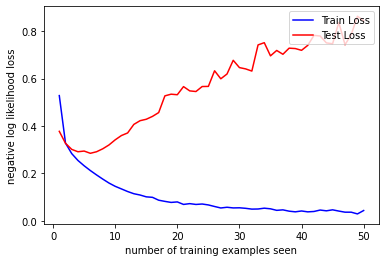

In [ ]:
fig = plt.figure()
plt.plot(range(1,n_epochs+1), train_losses, color='blue')
plt.plot(range(1,n_epochs+1), test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

## visualizing some predections on the test set

In [ ]:
example = enumerate(test_loader)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


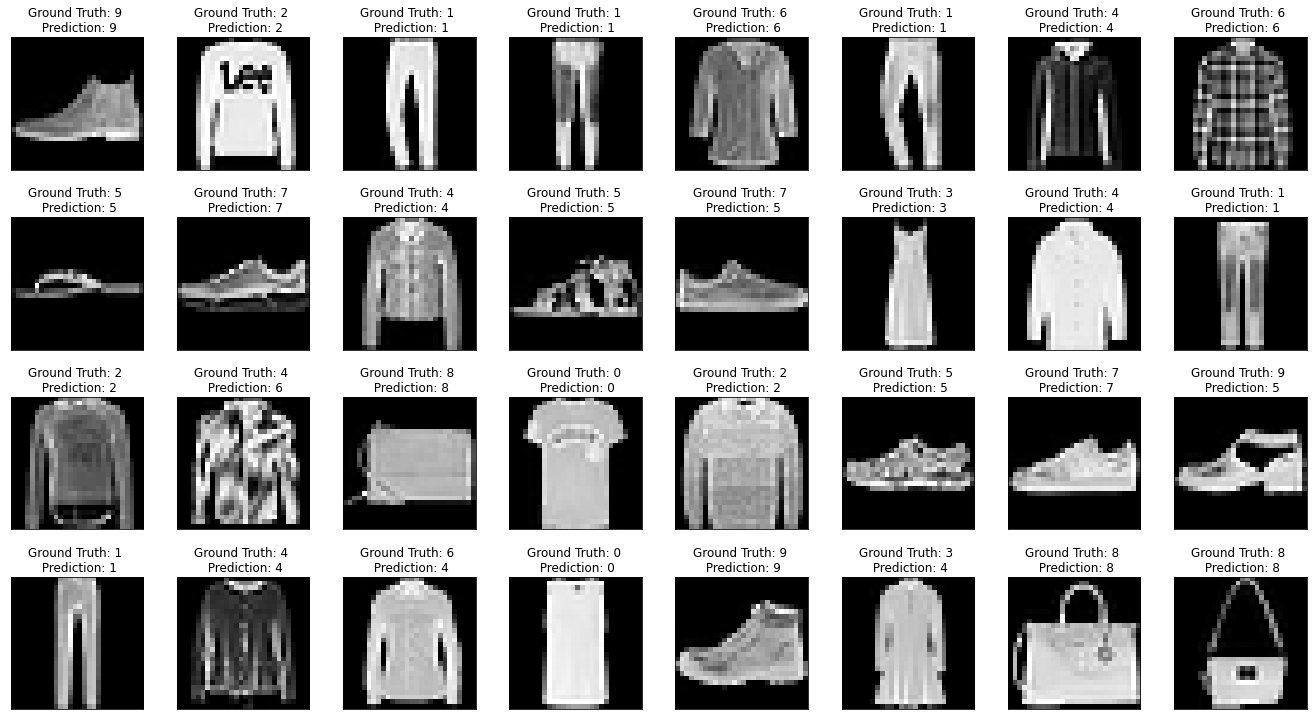

In [ ]:
batc_idx , (example_data,example_target) = next(example)
with torch.no_grad():
  output = network(example_data)

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {} \n Prediction: {}".format(example_target[i],output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])

#Question 2 Task C.

## creating the network with activation function as a variable to be able to modify it later.

In [50]:
class Net(nn.Module):
    def __init__(self,act_func):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(1024,256)
        self.fc2 = nn.Linear(256,10)

        self.act_func = act_func
        self.initializer_wights()

    def forward(self, x):
        x = self.act_func(F.max_pool2d(self.conv1(x), 2))
        x = self.act_func(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 1024)
        x = self.act_func(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
    
    def initializer_wights(self):
      for m in self.modules():
        if isinstance(m, nn.Conv2d) or isinstance(m,nn.Linear):
          nn.init.xavier_normal_(m.weight)

In [51]:
activation_functions = {F.tanh:"Tanh",F.sigmoid:"Sigmoid",F.elu:"Elu"}
learning_rate = 0.1
results = {}

## perform the training for each activation function and log the test accuracy

In [53]:
for act_func,act_func_name in activation_functions.items():
  network = Net(act_func)
  optimizer = optim.SGD(network.parameters(), lr=learning_rate)

  train_losses = []
  test_losses = []
  print("Training ... ")
  for epoch in range(1, n_epochs + 1):
    print("activation function -> {} \n epoch {}/{} ...".format(act_func_name,epoch,n_epochs))
    train(epoch,network,show_progress=False)
    test_acc = test(network,show_progress=False)
  results[act_func_name] = test_acc

Training ... 
activation function -> Tanh 
 epoch 1/50 ...


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


activation function -> Tanh 
 epoch 2/50 ...
activation function -> Tanh 
 epoch 3/50 ...
activation function -> Tanh 
 epoch 4/50 ...
activation function -> Tanh 
 epoch 5/50 ...
activation function -> Tanh 
 epoch 6/50 ...
activation function -> Tanh 
 epoch 7/50 ...
activation function -> Tanh 
 epoch 8/50 ...
activation function -> Tanh 
 epoch 9/50 ...
activation function -> Tanh 
 epoch 10/50 ...
activation function -> Tanh 
 epoch 11/50 ...
activation function -> Tanh 
 epoch 12/50 ...
activation function -> Tanh 
 epoch 13/50 ...
activation function -> Tanh 
 epoch 14/50 ...
activation function -> Tanh 
 epoch 15/50 ...
activation function -> Tanh 
 epoch 16/50 ...
activation function -> Tanh 
 epoch 17/50 ...
activation function -> Tanh 
 epoch 18/50 ...
activation function -> Tanh 
 epoch 19/50 ...
activation function -> Tanh 
 epoch 20/50 ...
activation function -> Tanh 
 epoch 21/50 ...
activation function -> Tanh 
 epoch 22/50 ...
activation function -> Tanh 
 epoch 23/50 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


activation function -> Sigmoid 
 epoch 2/50 ...
activation function -> Sigmoid 
 epoch 3/50 ...
activation function -> Sigmoid 
 epoch 4/50 ...
activation function -> Sigmoid 
 epoch 5/50 ...
activation function -> Sigmoid 
 epoch 6/50 ...
activation function -> Sigmoid 
 epoch 7/50 ...
activation function -> Sigmoid 
 epoch 8/50 ...
activation function -> Sigmoid 
 epoch 9/50 ...
activation function -> Sigmoid 
 epoch 10/50 ...
activation function -> Sigmoid 
 epoch 11/50 ...
activation function -> Sigmoid 
 epoch 12/50 ...
activation function -> Sigmoid 
 epoch 13/50 ...
activation function -> Sigmoid 
 epoch 14/50 ...
activation function -> Sigmoid 
 epoch 15/50 ...
activation function -> Sigmoid 
 epoch 16/50 ...
activation function -> Sigmoid 
 epoch 17/50 ...
activation function -> Sigmoid 
 epoch 18/50 ...
activation function -> Sigmoid 
 epoch 19/50 ...
activation function -> Sigmoid 
 epoch 20/50 ...
activation function -> Sigmoid 
 epoch 21/50 ...
activation function -> Sigmo

In [54]:
print(results)

{'Tanh': tensor(91.1700), 'Sigmoid': tensor(90.8500), 'Elu': tensor(90.1900)}


## Now we use relu for different learning rates

In [55]:
learning_rates = [0.001,0.1,0.5,1,10]
results = {}

In [ ]:
for lr in learning_rates:
  network = Net(F.relu)
  optimizer = optim.SGD(network.parameters(), lr=lr)

  train_losses = []
  test_losses = []
  print("Training ... ")
  for epoch in range(1, n_epochs + 1):
    print("learning rate = {} \n epoch {}/{} ...".format(lr,epoch,n_epochs))
    train(epoch,network,show_progress=False)
    test_acc = test(network,show_progress=False)
  results["lr = "+str(lr)] = test_acc

Training ... 
learning rate = 0.001 
 epoch 1/50 ...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


learning rate = 0.001 
 epoch 2/50 ...
learning rate = 0.001 
 epoch 3/50 ...
learning rate = 0.001 
 epoch 4/50 ...
learning rate = 0.001 
 epoch 5/50 ...
learning rate = 0.001 
 epoch 6/50 ...
learning rate = 0.001 
 epoch 7/50 ...
learning rate = 0.001 
 epoch 8/50 ...
learning rate = 0.001 
 epoch 9/50 ...
learning rate = 0.001 
 epoch 10/50 ...
learning rate = 0.001 
 epoch 11/50 ...
learning rate = 0.001 
 epoch 12/50 ...
learning rate = 0.001 
 epoch 13/50 ...
learning rate = 0.001 
 epoch 14/50 ...
learning rate = 0.001 
 epoch 15/50 ...
learning rate = 0.001 
 epoch 16/50 ...
learning rate = 0.001 
 epoch 17/50 ...
learning rate = 0.001 
 epoch 18/50 ...
learning rate = 0.001 
 epoch 19/50 ...
learning rate = 0.001 
 epoch 20/50 ...
learning rate = 0.001 
 epoch 21/50 ...
learning rate = 0.001 
 epoch 22/50 ...
learning rate = 0.001 
 epoch 23/50 ...
learning rate = 0.001 
 epoch 24/50 ...
learning rate = 0.001 
 epoch 25/50 ...
learning rate = 0.001 
 epoch 26/50 ...
learning

In [ ]:
print(results)

#Question 2 Task D.

In [ ]:
class Net(nn.Module):
    def __init__(self,dropout_p):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1_dropout = nn.Dropout(p=dropout_p)
        self.fc1 = nn.Linear(1024,256)
        self.fc2 = nn.Linear(256,10)

        self.initializer_wights()

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 1024)
        x = F.relu(self.fc1(x))
        x = self.fc1_dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x)
    
    def initializer_wights(self):
      for m in self.modules():
        if isinstance(m, nn.Conv2d) or isinstance(m,nn.Linear):
          nn.init.xavier_normal_(m.weight)

# x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
# x = F.dropout(x, training=self.training)

In [ ]:
learning_rate = 0.1
dropout_p = 0.3
network = Net(dropout_p)
optimizer = optim.SGD(network.parameters(), lr=learning_rate)

In [ ]:
summary(network,(1,28,28))
transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.

graph = hl.build_graph(network, example_data,transforms = transforms)
graph.theme = hl.graph.THEMES['blue'].copy()
graph.save('CNN_Model_dropout', format='png')
Image('CNN_Model_dropout.png')

In [ ]:
train_losses = []
test_losses = []
print("Training ... ")
for epoch in range(1, n_epochs + 1):
  print("epoch {}/{}----------------------------------------------------------------------".format(epoch,n_epochs))
  train(epoch,network)
  test(network)

In [ ]:
fig = plt.figure()
plt.plot(range(1,n_epochs+1), train_losses, color='blue')
plt.plot(range(1,n_epochs+1), test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')